## Import libraries


In [54]:
#required libraries
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss

import warnings
from sklearn.datasets import make_blobs
from torch import optim
#import torch
warnings.filterwarnings('ignore')


## Generate non-linearly separable data


(1000, 2) (1000,)


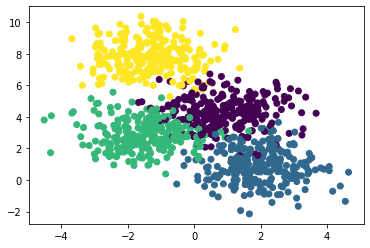

(750, 2) (250, 2) (1000,)


In [55]:
#generate data using make_blobs function from sklearn.
#centers = 4 indicates different types of classes
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

#visualize the data
plt.scatter(data[:,0], data[:,1], c=labels, cmap='viridis')
plt.show()

#splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_test.shape, labels.shape)

In [65]:
#converting the numpy array to torch tensors
#map function for the efficient conversion of numpy array to Pytorch tensors.
X_train, Y_train, X_test, Y_test = map(torch.tensor, (X_train, Y_train, X_test, Y_test))

#X_train to float because the default tensor type in PyTorch is a float tensor. 
X_train = X_train.float()
Y_train = Y_train.long()
X_test = X_test.float()

print(X_train.shape, Y_train.shape)

torch.Size([750, 2]) torch.Size([750])


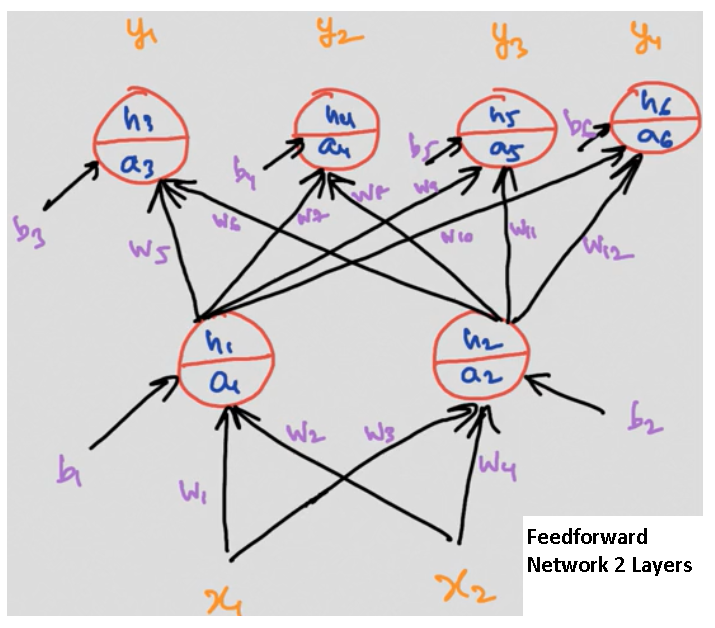

## Model Building and fitting

In [66]:

class FirstNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(0)
        self.net = nn.Sequential( #sequential operation
            nn.Linear(2, 2), 
            nn.Sigmoid(), 
            nn.Linear(2, 4), 
            nn.Softmax())

    def forward(self, X):
        return self.net(X)
    

In [67]:
def fit(x, y, model, opt, loss_fn, epochs = 1000):
    """Generic function for training a model """
    for epoch in range(epochs):
        loss = loss_fn(model(x), y) 

        loss.backward()
        opt.step()
        opt.zero_grad()
    
    return loss.item()

#define loss 
loss_fn = nn.functional.cross_entropy
#define optimizer 
#opt = optim.SGD(model.parameters(), lr=0.2)


In [68]:
model = FirstNetwork()
learning_rate = 0.2

opt = optim.SGD(model.parameters(), lr=learning_rate) #define optimizer

#calculate time
tic = time.time()
print('Final loss', fit(X_train, Y_train, model, opt, loss_fn))
toc = time.time()
print('Time taken', toc - tic)

Final loss 1.1441882848739624
Time taken 0.6329245567321777


In [69]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [70]:
#moving inputs to GPU
X_train=X_train.to(device)
Y_train=Y_train.to(device)

model = FirstNetwork()
model.to(device) #moving the network to GPU

#calculate time
tic = time.time()
print('Final loss', fit(X_train, Y_train, model, opt, loss_fn))
toc = time.time()
print('Time taken', toc - tic)

Final loss 1.395160436630249
Time taken 0.660529375076294


In [71]:
## Accuracy
def accuracy(y_hat, y):
     pred = torch.argmax(y_hat, dim=1)
     return accuracy_score(pred, y) #(pred == y).float().mean()

Y_hat = model(X_test)
accuracy(Y_hat, Y_test)

0.16